In [2]:
# Importing the libraries:
from keras.layers import SimpleRNN, Embedding, Dense, LSTM
from keras.models import Sequential
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

In [3]:
# Importing the dataset: 
data = pd.read_csv("SPAM text message 20170820 - Data.csv")
print(data.head())

  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...


In [6]:
texts = []  # stores emails as list of strings.
labels = [] # stores ham/spam where, 'Ham' == 0 and 'Spam' == 1 corresponding to that email.

# enumerate attaches a stream of data with integers starting from 0. 
for i, label in enumerate(data['Category']):
    print(i,label)
    texts.append(data['Message'][i])
    if label == 'ham':
        labels.append(0)
    else:
        labels.append(1)

# Converting list to python numpy array:
texts = np.asarray(texts)
labels = np.asarray(labels)


print("number of texts :" , len(texts))
print("number of labels: ", len(labels))

0 ham
1 ham
2 spam
3 ham
4 ham
5 spam
6 ham
7 ham
8 spam
9 spam
10 ham
11 spam
12 spam
13 ham
14 ham
15 spam
16 ham
17 ham
18 ham
19 spam
20 ham
21 ham
22 ham
23 ham
24 ham
25 ham
26 ham
27 ham
28 ham
29 ham
30 ham
31 ham
32 ham
33 ham
34 spam
35 ham
36 ham
37 ham
38 ham
39 ham
40 ham
41 ham
42 spam
43 ham
44 ham
45 ham
46 ham
47 ham
48 ham
49 ham
50 ham
51 ham
52 ham
53 ham
54 spam
55 ham
56 spam
57 ham
58 ham
59 ham
60 ham
61 ham
62 ham
63 ham
64 ham
65 spam
66 ham
67 spam
68 spam
69 ham
70 ham
71 ham
72 ham
73 ham
74 ham
75 ham
76 ham
77 ham
78 ham
79 ham
80 ham
81 ham
82 ham
83 ham
84 ham
85 ham
86 ham
87 ham
88 ham
89 ham
90 ham
91 ham
92 ham
93 spam
94 ham
95 spam
96 ham
97 ham
98 ham
99 ham
100 ham
101 ham
102 ham
103 ham
104 ham
105 ham
106 ham
107 ham
108 ham
109 ham
110 ham
111 ham
112 ham
113 ham
114 spam
115 ham
116 ham
117 spam
118 ham
119 ham
120 spam
121 spam
122 ham
123 spam
124 ham
125 ham
126 ham
127 ham
128 ham
129 ham
130 ham
131 ham
132 ham
133 ham
134 spam
135 spa

In [13]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

# Setting features and maxlen:
#########################################
# number of words used as features
max_features = 10000
# cut off the words after seeing 500 words in each document(email)
maxlen = 500

# Segregating training and testing data:
#########################################
# we will use 80% of data as training, 20% as validation data
training_samples = int(5572 * .8)
validation_samples = int(5572 - training_samples)
# sanity check
print(len(texts) == (training_samples + validation_samples))
print("The number of training {0}, validation {1} ".format(training_samples, validation_samples))
#########################################

tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts) 
sequences = tokenizer.texts_to_sequences(texts) # Transforms each text in texts to a sequence of integers based on word-index

word_index = tokenizer.word_index  # 'word_index' is a dictionary of tokenizer-assigned word-index mapping.
print("Found {0} unique words: ".format(len(word_index)))

data = pad_sequences(sequences, maxlen=maxlen) # Pads sequences to the same length(either maxlen or max size of a sequence).
print("data shape: ", data.shape)


np.random.seed(42) # Setting it generates the same random numbers multiple times. Used for getting the same numbers in case
# shuffle data
indices = np.arange(data.shape[0]) # Represents total no of data points.
np.random.shuffle(indices) #  shuffles the array along the first axis of a multi-dimensional array.
data = data[indices]
labels = labels[indices]
# By now the data has been shuffled.

# Now we break data into train and test samples:
texts_train = data[:training_samples]
y_train = labels[:training_samples]
texts_test = data[training_samples:]
y_test = labels[training_samples:]

True
The number of training 4457, validation 1115 
Found 9004 unique words: 
data shape:  (5572, 500)
5572


In [15]:
model = Sequential()
model.add(Embedding(max_features, 32)) # output size = 32.
model.add(SimpleRNN(32)) # 32 is the no of units.
model.add(Dense(1, activation='sigmoid')) # 1 dense unit to follow simple RNN layer.

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
# Root Mean Squared Propagation, or RMSProp, is an extension of gradient descent and the AdaGrad version of gradient descent 
# that uses a decaying average of partial gradients in the adaptation of the step size for each parameter.

# 'binary_crossentropy': Used as a loss function for binary classification model. For multiclass classification, use 'categorical_crossentropy'


history_rnn = model.fit(texts_train, y_train, epochs=10, batch_size=60, validation_split=0.2) # The validation set is a set
# of data, separate from the training set, that is used to validate our model performance during training.

# 'history_rnn' is History callback object. This object keeps track of the accuracy, loss and other training metrics, for each epoch, in the memory.

Epoch 1/10
60/60 [==============================] - 10s 120ms/step - loss: 0.4356 - acc: 0.8485 - val_loss: 0.3623 - val_acc: 0.8823
Epoch 2/10
60/60 [==============================] - 7s 122ms/step - loss: 0.3838 - acc: 0.8628 - val_loss: 0.3698 - val_acc: 0.8823
Epoch 3/10
60/60 [==============================] - 6s 101ms/step - loss: 0.3248 - acc: 0.8710 - val_loss: 0.3685 - val_acc: 0.8823
Epoch 4/10
60/60 [==============================] - 6s 102ms/step - loss: 0.2877 - acc: 0.8724 - val_loss: 0.3891 - val_acc: 0.8711
Epoch 5/10
60/60 [==============================] - 6s 102ms/step - loss: 0.2116 - acc: 0.9181 - val_loss: 0.4428 - val_acc: 0.8307
Epoch 6/10
60/60 [==============================] - 7s 123ms/step - loss: 0.4830 - acc: 0.7408 - val_loss: 0.3827 - val_acc: 0.8800
Epoch 7/10
60/60 [==============================] - 8s 129ms/step - loss: 0.2320 - acc: 0.9142 - val_loss: 0.4900 - val_acc: 0.8812
Epoch 8/10
60/60 [==============================] - 7s 119ms/step - loss: 0

[0.8485273718833923, 0.8628330826759338, 0.8709677457809448, 0.8723702430725098, 0.9180925488471985, 0.7408134937286377, 0.9141654968261719, 0.9004207849502563, 0.9138849973678589, 0.9352033734321594]
[0.8822869658470154, 0.8822869658470154, 0.8822869658470154, 0.871076226234436, 0.8307175040245056, 0.8800448179244995, 0.8811659216880798, 0.8766816258430481, 0.871076226234436, 0.8329596519470215]
[0.43557116389274597, 0.3838345408439636, 0.32478269934654236, 0.28770843148231506, 0.2115548700094223, 0.48298871517181396, 0.23201896250247955, 0.2728765904903412, 0.20818020403385162, 0.15825435519218445]


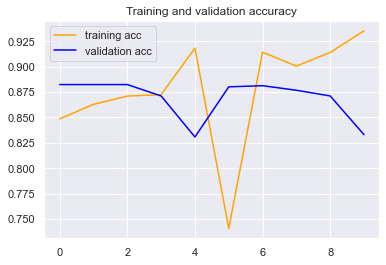

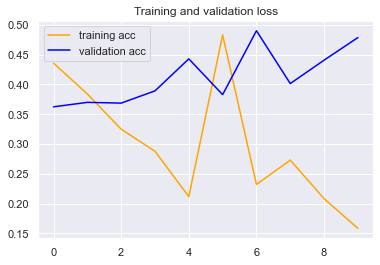

In [16]:
acc = history_rnn.history['acc'] # 'Accuracy' metric of model after each epoch.
val_acc = history_rnn.history['val_acc'] # 'Val_Accuracy' metric of model after each epoch.
loss = history_rnn.history['loss'] # 'Loss metric' of model after each epoch.
val_loss = history_rnn.history['val_loss'] # 'Val_Loss' metric of model after each epoch.
# The size of each list above will be equal to the no of epochs.
epochs = range(len(acc))

# Plotting (Accuracy Vs Epoch in Orange) and (Val_Accuracy vs epoch in blue):
plt.plot(epochs, acc, '-', color='orange', label='training acc')
plt.plot(epochs, val_acc, '-', color='blue', label='validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

# Plotting (Loss Vs Epoch in Orange) and (Val_Loss vs epoch in blue):
plt.plot(epochs, loss, '-', color='orange', label='training acc')
plt.plot(epochs, val_loss,  '-', color='blue', label='validation acc')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [23]:
import numpy as np
from sklearn.metrics import confusion_matrix
predict_x = model.predict(texts_test) 
#print(predict_x)
pred = np.argmax(predict_x,axis=1) # Returns the indices of the maximum values along an axis in a matrix, as an array.
acc = model.evaluate(texts_test, y_test)
# evaluate() is for evaluating the already trained model using the validation (or test) data and the corresponding labels. 
# It returns the loss value and metrics values for the model. predict() is for the actual prediction.
proba_rnn = np.argmax(model.predict(texts_test), axis=-1)
print(proba_rnn)
print("Test loss is {0:.2f} accuracy is {1:.2f}  ".format(acc[0],acc[1]))
print(confusion_matrix(pred, y_test))

35/35 [==============================] - 1s 23ms/step
0
35/35 [==============================] - 1s 23ms/step - loss: 0.5613 - acc: 0.8260
[0.5613204836845398, 0.8260089755058289]
35/35 [==============================] - 1s 25ms/step
[0 0 0 ... 0 0 0]
Test loss is 0.56 accuracy is 0.83  
[[962 153]
 [  0   0]]


In [12]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history_ltsm = model.fit(texts_train, y_train, epochs=10, batch_size=60, validation_split=0.2)

Epoch 1/10
60/60 [==============================] - 14s 193ms/step - loss: 0.3087 - acc: 0.8797 - val_loss: 0.1555 - val_acc: 0.9507
Epoch 2/10
60/60 [==============================] - 11s 184ms/step - loss: 0.1105 - acc: 0.9762 - val_loss: 0.0905 - val_acc: 0.9742
Epoch 3/10
60/60 [==============================] - 12s 196ms/step - loss: 0.0705 - acc: 0.9877 - val_loss: 0.0652 - val_acc: 0.9821
Epoch 4/10
60/60 [==============================] - 12s 199ms/step - loss: 0.0484 - acc: 0.9877 - val_loss: 0.0471 - val_acc: 0.9910
Epoch 5/10
60/60 [==============================] - 12s 200ms/step - loss: 0.0295 - acc: 0.9938 - val_loss: 0.0422 - val_acc: 0.9865
Epoch 6/10
60/60 [==============================] - 12s 200ms/step - loss: 0.0223 - acc: 0.9938 - val_loss: 0.0467 - val_acc: 0.9843
Epoch 7/10
60/60 [==============================] - 12s 199ms/step - loss: 0.0143 - acc: 0.9969 - val_loss: 0.0566 - val_acc: 0.9765
Epoch 8/10
60/60 [==============================] - 12s 199ms/step - 

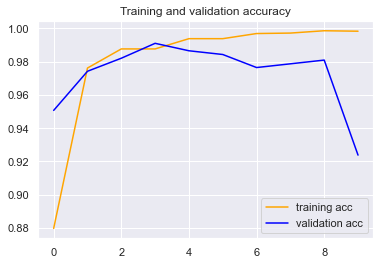

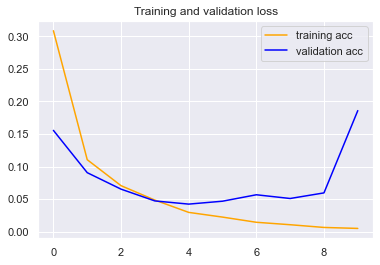

In [13]:
acc = history_ltsm.history['acc']
val_acc = history_ltsm.history['val_acc']
loss = history_ltsm.history['loss']
val_loss = history_ltsm.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, '-', color='orange', label='training acc')
plt.plot(epochs, val_acc, '-', color='blue', label='validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, '-', color='orange', label='training acc')
plt.plot(epochs, val_loss,  '-', color='blue', label='validation acc')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [17]:
pred = np.argmax(model.predict(texts_test), axis=-1)
acc = model.evaluate(texts_test, y_test)
proba_ltsm = np.argmax(model.predict(texts_test), axis=-1)
from sklearn.metrics import confusion_matrix
print("Test loss is {0:.2f} accuracy is {1:.2f}  ".format(acc[0],acc[1]))
print(confusion_matrix(pred, y_test))

35/35 [==============================] - 2s 56ms/step
Test loss is 0.17 accuracy is 0.93  
[[961 154]
 [  0   0]]
